In [1]:
from ultralytics import YOLO
import os

# Load YOLO model for SOV detection
sov_model_path = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Models/yolo_training/yolov8_sov/weights/best.pt"
sov_model = YOLO(sov_model_path).to(device="cuda:6")

# Paths
input_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/train_augmented"  # Folder with images
output_txt_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/aorta_data/SOV_labels/train"  # Folder for predicted labels

# Create output directory
os.makedirs(output_txt_folder, exist_ok=True)

# Process each image in the folder
for frame_file in sorted(os.listdir(input_folder)):
    if frame_file.lower().endswith(('.jpg', '.png', '.jpeg')):  
        image_path = os.path.join(input_folder, frame_file)
        output_txt_path = os.path.join(output_txt_folder, frame_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Run YOLO inference for SOV detection
        results = sov_model(image_path)

        # Extract bounding boxes
        boxes = results[0].boxes
        confs = boxes.conf if boxes is not None else []  # Confidence scores

        with open(output_txt_path, "w") as f:
            for i in range(len(confs)):
                # YOLO format: class x_center y_center width height (all normalized)
                class_id = 0  # Assuming SOV is class 0
                x_center, y_center, width, height = map(float, boxes.xywhn[i])  # Normalized coordinates
                
                # Save the bounding box in YOLO format
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"✅ SOV Predictions saved in {output_txt_folder}")



image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/train_augmented/A A - 3mensio Screen Recording_longitudinal_view_471.png: 640x640 1 SOV, 3.7ms
Speed: 8.7ms preprocess, 3.7ms inference, 122.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/train_augmented/A A - 3mensio Screen Recording_longitudinal_view_471_blur.jpg: 640x640 1 SOV, 4.2ms
Speed: 3.5ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/train_augmented/A A - 3mensio Screen Recording_longitudinal_view_471_brightness_contrast.jpg: 640x640 1 SOV, 6.2ms
Speed: 4.2ms preprocess, 6.2ms inference, 12.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/train_augmented/A A

In [2]:
from ultralytics import YOLO
import os

# Load YOLO model for SOV detection
sov_model_path = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Models/yolo_training/yolov8_sov/weights/best.pt"
sov_model = YOLO(sov_model_path).to(device="cuda:6")

# Paths
input_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/val"  # Folder with images
output_txt_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/aorta_data/SOV_labels/val"  # Folder for predicted labels

# Create output directory
os.makedirs(output_txt_folder, exist_ok=True)

# Process each image in the folder
for frame_file in sorted(os.listdir(input_folder)):
    if frame_file.lower().endswith(('.jpg', '.png', '.jpeg')):  
        image_path = os.path.join(input_folder, frame_file)
        output_txt_path = os.path.join(output_txt_folder, frame_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Run YOLO inference for SOV detection
        results = sov_model(image_path)

        # Extract bounding boxes
        boxes = results[0].boxes
        confs = boxes.conf if boxes is not None else []  # Confidence scores

        with open(output_txt_path, "w") as f:
            for i in range(len(confs)):
                # YOLO format: class x_center y_center width height (all normalized)
                class_id = 0  # Assuming SOV is class 0
                x_center, y_center, width, height = map(float, boxes.xywhn[i])  # Normalized coordinates
                
                # Save the bounding box in YOLO format
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"✅ SOV Predictions saved in {output_txt_folder}")



image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/val/RIVAS SEGURA, LUIS - 3mensio Screen Recording_longitudinal_view_314.png: 640x576 1 SOV, 5.8ms
Speed: 3.6ms preprocess, 5.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/val/RIVAS SEGURA, LUIS - 3mensio Screen Recording_longitudinal_view_377.png: 640x576 1 SOV, 5.3ms
Speed: 1.9ms preprocess, 5.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/val/S B - 3mensio Screen Recording_longitudinal_view_1003.png: 640x608 1 SOV, 6.1ms
Speed: 2.3ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/Original Data/images/val/S B - 3mensio Screen Recording_longitudinal_view

✅ mAP@0.5: 0.5000
✅ mAP@0.5:0.95: 0.3000


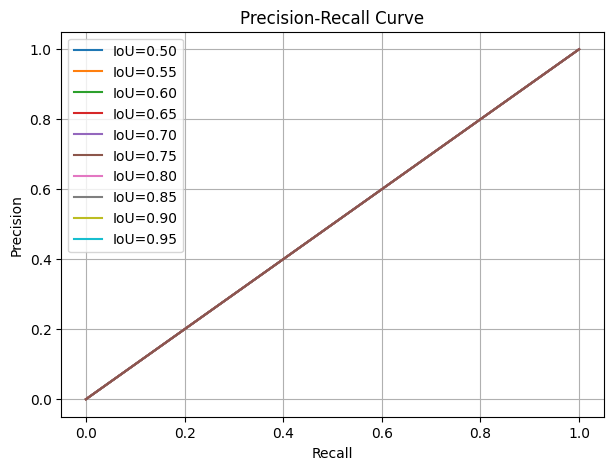

In [3]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Paths to YOLO ground truth and predicted labels
ground_truth_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/aorta_data/labels/val"  # Replace with your path
predictions_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Models/predicted_labels"  # Replace with your path
iou_thresholds = np.arange(0.5, 1.0, 0.05)  # IoU thresholds from 0.5 to 0.95

def load_yolo_labels(label_path):
    """Load YOLO format labels (class_id, x_center, y_center, width, height)."""
    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                parts = list(map(float, line.strip().split()))
                if len(parts) == 5:  # Ensure it's in YOLO format
                    labels.append(parts)
    return np.array(labels)  # Convert to NumPy array

def convert_to_absolute(labels, img_w, img_h):
    """Convert normalized YOLO format to absolute (x1, y1, x2, y2)."""
    abs_labels = []
    for lbl in labels:
        class_id, x_c, y_c, w, h = lbl
        x1 = int((x_c - w / 2) * img_w)
        y1 = int((y_c - h / 2) * img_h)
        x2 = int((x_c + w / 2) * img_w)
        y2 = int((y_c + h / 2) * img_h)
        abs_labels.append((class_id, x1, y1, x2, y2))
    return np.array(abs_labels)

def compute_iou(box1, box2):
    """Compute IoU between two bounding boxes."""
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

def evaluate_map():
    """Calculate mAP for YOLO labels."""
    all_precisions = []
    all_recalls = []
    all_aps = []

    for iou_threshold in iou_thresholds:
        precisions = []
        recalls = []
        
        for gt_file in glob.glob(os.path.join(ground_truth_folder, "*.txt")):
            pred_file = os.path.join(predictions_folder, os.path.basename(gt_file))
            gt_boxes = load_yolo_labels(gt_file)
            pred_boxes = load_yolo_labels(pred_file)

            if len(gt_boxes) == 0 or len(pred_boxes) == 0:
                continue  # Skip images with no detections or ground truths

            # Convert to absolute coordinates (assuming 640x640 image)
            img_w, img_h = 640, 640  # Adjust to actual image size
            gt_boxes_abs = convert_to_absolute(gt_boxes, img_w, img_h)
            pred_boxes_abs = convert_to_absolute(pred_boxes, img_w, img_h)

            # Sort predictions by confidence (assume confidence is last column)
            pred_boxes_abs = sorted(pred_boxes_abs, key=lambda x: x[4], reverse=True)

            tp, fp = 0, 0
            matched = set()

            for pred in pred_boxes_abs:
                pred_class, px1, py1, px2, py2 = pred

                best_iou = 0
                best_gt_idx = -1

                for gt_idx, gt in enumerate(gt_boxes_abs):
                    gt_class, gx1, gy1, gx2, gy2 = gt

                    if pred_class == gt_class:
                        iou = compute_iou((px1, py1, px2, py2), (gx1, gy1, gx2, gy2))
                        if iou > best_iou and iou >= iou_threshold and gt_idx not in matched:
                            best_iou = iou
                            best_gt_idx = gt_idx

                if best_gt_idx >= 0:
                    tp += 1
                    matched.add(best_gt_idx)
                else:
                    fp += 1

            fn = len(gt_boxes_abs) - len(matched)
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            precisions.append(precision)
            recalls.append(recall)

        if precisions and recalls:
            precisions, recalls = zip(*sorted(zip(recalls, precisions)))
            ap = auc(recalls, precisions)
            all_aps.append(ap)
            all_precisions.append(precisions)
            all_recalls.append(recalls)

    # Compute mAP
    mAP_50 = all_aps[0]  # AP at IoU=0.5
    mAP_50_95 = np.mean(all_aps)  # Average over IoU thresholds

    return mAP_50, mAP_50_95, all_precisions, all_recalls

# Run evaluation
mAP_50, mAP_50_95, precisions, recalls = evaluate_map()

print(f"✅ mAP@0.5: {mAP_50:.4f}")
print(f"✅ mAP@0.5:0.95: {mAP_50_95:.4f}")

# Plot PR curve
plt.figure(figsize=(7, 5))
for i in range(len(iou_thresholds)):
    plt.plot(recalls[i], precisions[i], label=f'IoU={iou_thresholds[i]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [5]:
import cv2
import os

# Paths
image_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/aorta_data/images/val"  # Folder with images
label_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Models/predicted_labels"  # Folder with predicted labels
output_folder = "/mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions"  # Save annotated images

# Create output directory if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

# Process each image
for frame_file in sorted(os.listdir(image_folder)):
    if frame_file.lower().endswith(('.jpg', '.png', '.jpeg')):  
        image_path = os.path.join(image_folder, frame_file)
        label_path = os.path.join(label_folder, frame_file.replace('.jpg', '.txt').replace('.png', '.txt'))
        output_image_path = os.path.join(output_folder, frame_file)

        # Load the image
        img = cv2.imread(image_path)
        h, w, _ = img.shape  # Image dimensions

        # Check if label file exists
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                lines = f.readlines()

            # Draw bounding boxes
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)

                    # Convert YOLO normalized format to absolute coordinates
                    x1 = int((x_center - width / 2) * w)
                    y1 = int((y_center - height / 2) * h)
                    x2 = int((x_center + width / 2) * w)
                    y2 = int((y_center + height / 2) * h)

                    # Draw bounding box
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img, f"Class {int(class_id)}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                                0.6, (0, 255, 0), 2)

        # Save annotated image
        cv2.imwrite(output_image_path, img)
        print(f"✅ Annotated image saved: {output_image_path}")


✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/RIVAS SEGURA, LUIS - 3mensio Screen Recording_longitudinal_view_314.png
✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/RIVAS SEGURA, LUIS - 3mensio Screen Recording_longitudinal_view_377.png
✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/S B - 3mensio Screen Recording_longitudinal_view_1003.png
✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/S B - 3mensio Screen Recording_longitudinal_view_845.png
✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/S B - 3mensio Screen Recording_longitudinal_view_941.png
✅ Annotated image saved: /mnt/nvme_disk2/User_data/nb57077k/cardiovision/phase2/Dataset/visualized_predictions/S G_longitudinal_v